In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data= pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: >

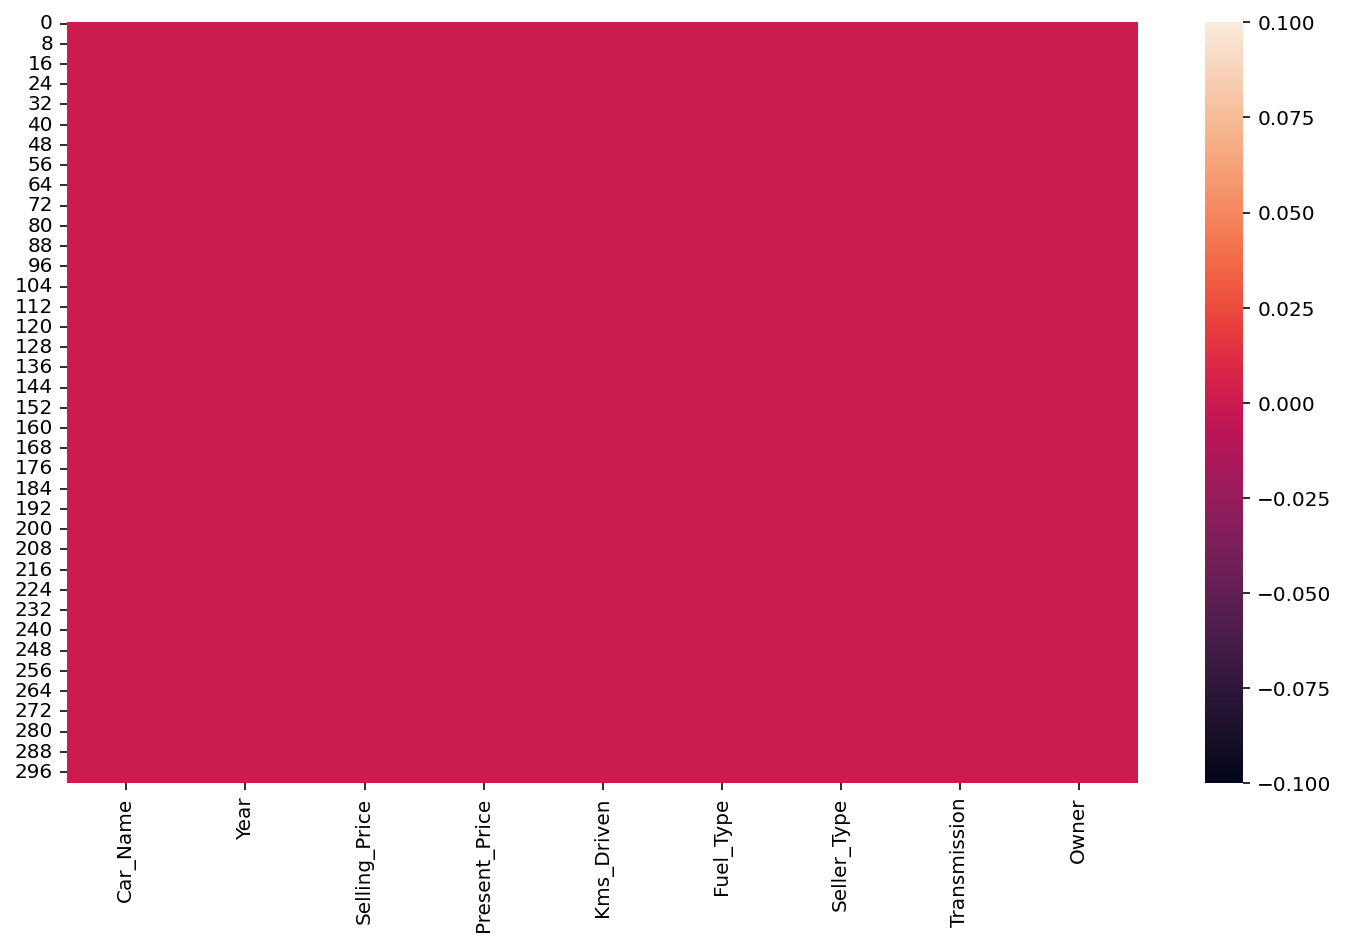

In [7]:
sns.heatmap(data.isnull())

In [8]:
#check for duplicated data
dup = data.duplicated().any()
print('Are there any duplicates: ', dup)

Are there any duplicates:  True


In [9]:
#drop all duplicated data
data = data.drop_duplicates()

In [10]:
#check again for duplicates
dup = data.duplicated().any()
print('Are there any duplicates: ', dup)

Are there any duplicates:  False


In [11]:
#check the datas stats
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
#check the datas information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [13]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
#get the years of the cars
pie = data['Year'].value_counts()
pie

Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

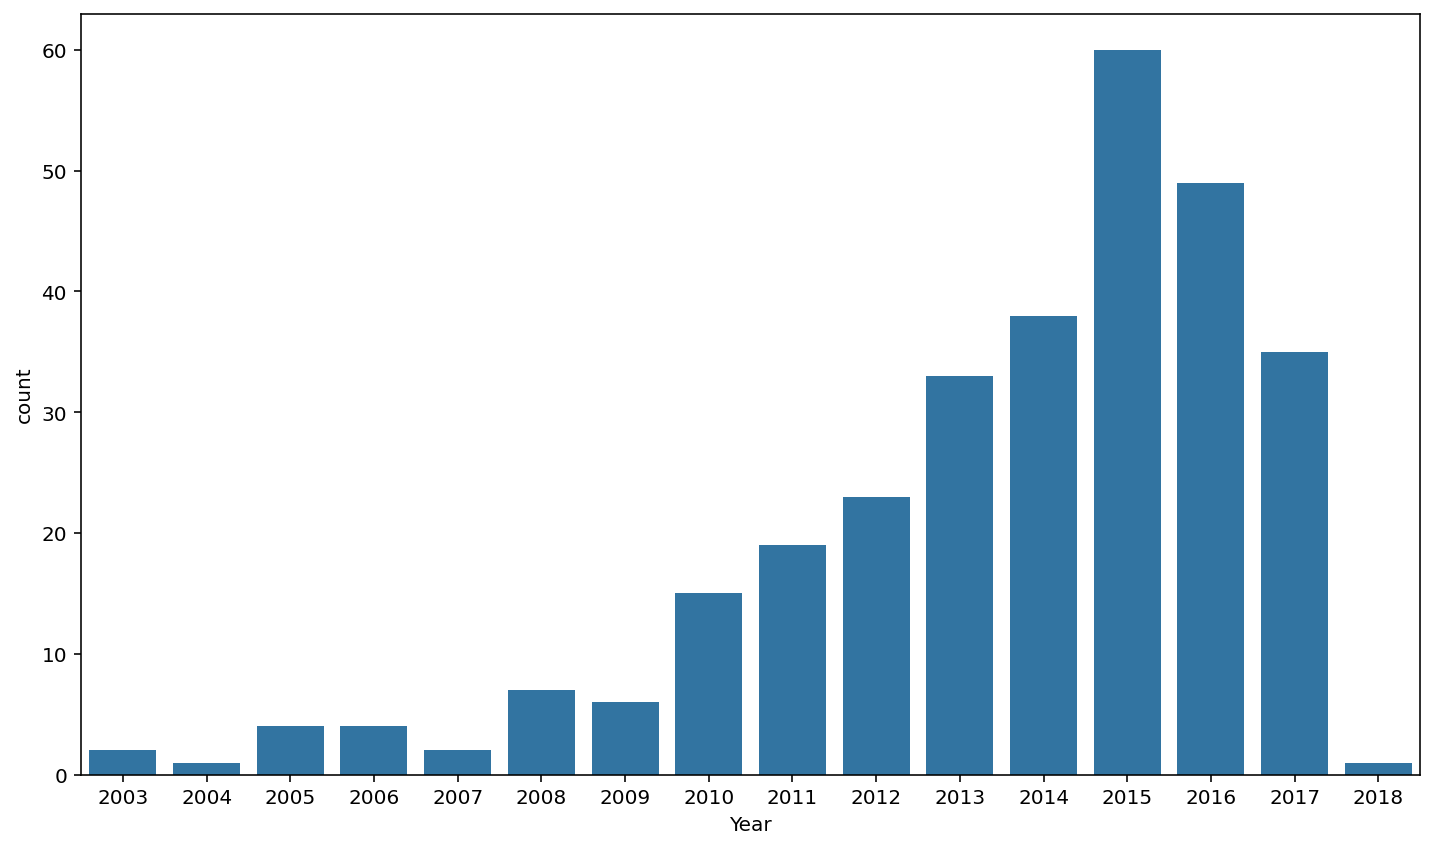

In [20]:
#show it in a chart
sns.countplot(x='Year',data=data)

In [28]:
#top 5 cars that appear the most
pie =data['Car_Name'].value_counts().sort_values(ascending=False).head(5)

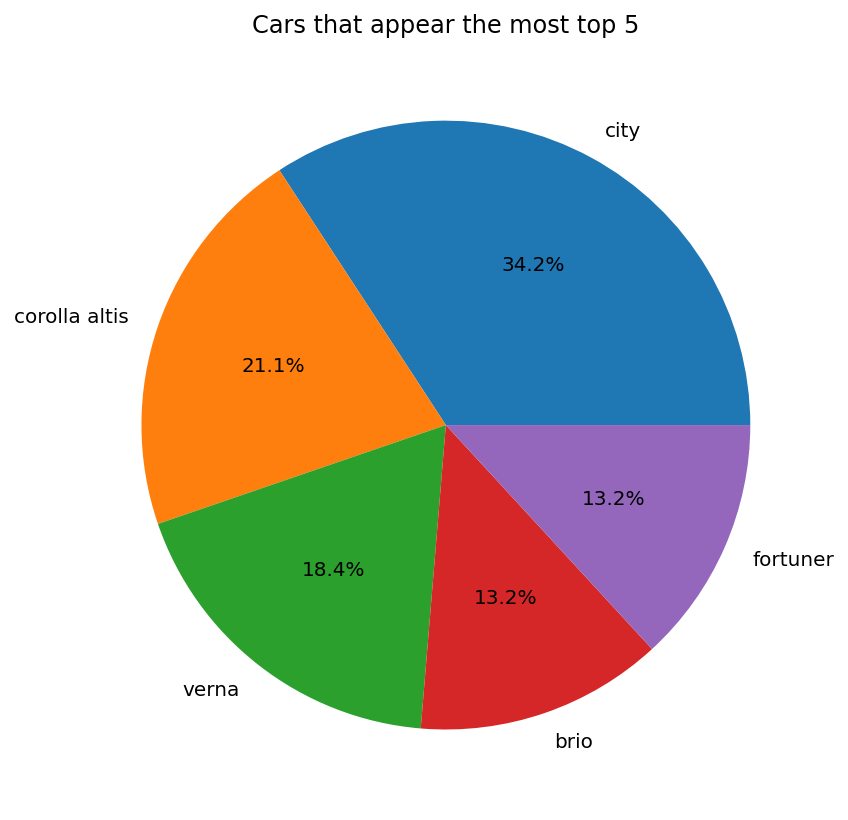

In [33]:
plt.pie(pie,labels=pie.index,autopct='%1.1f%%')
plt.title("Cars that appear the most top 5")
plt.show()

In [36]:
#check which transmisson appears the most
data['Transmission'].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

<Axes: xlabel='Transmission', ylabel='count'>

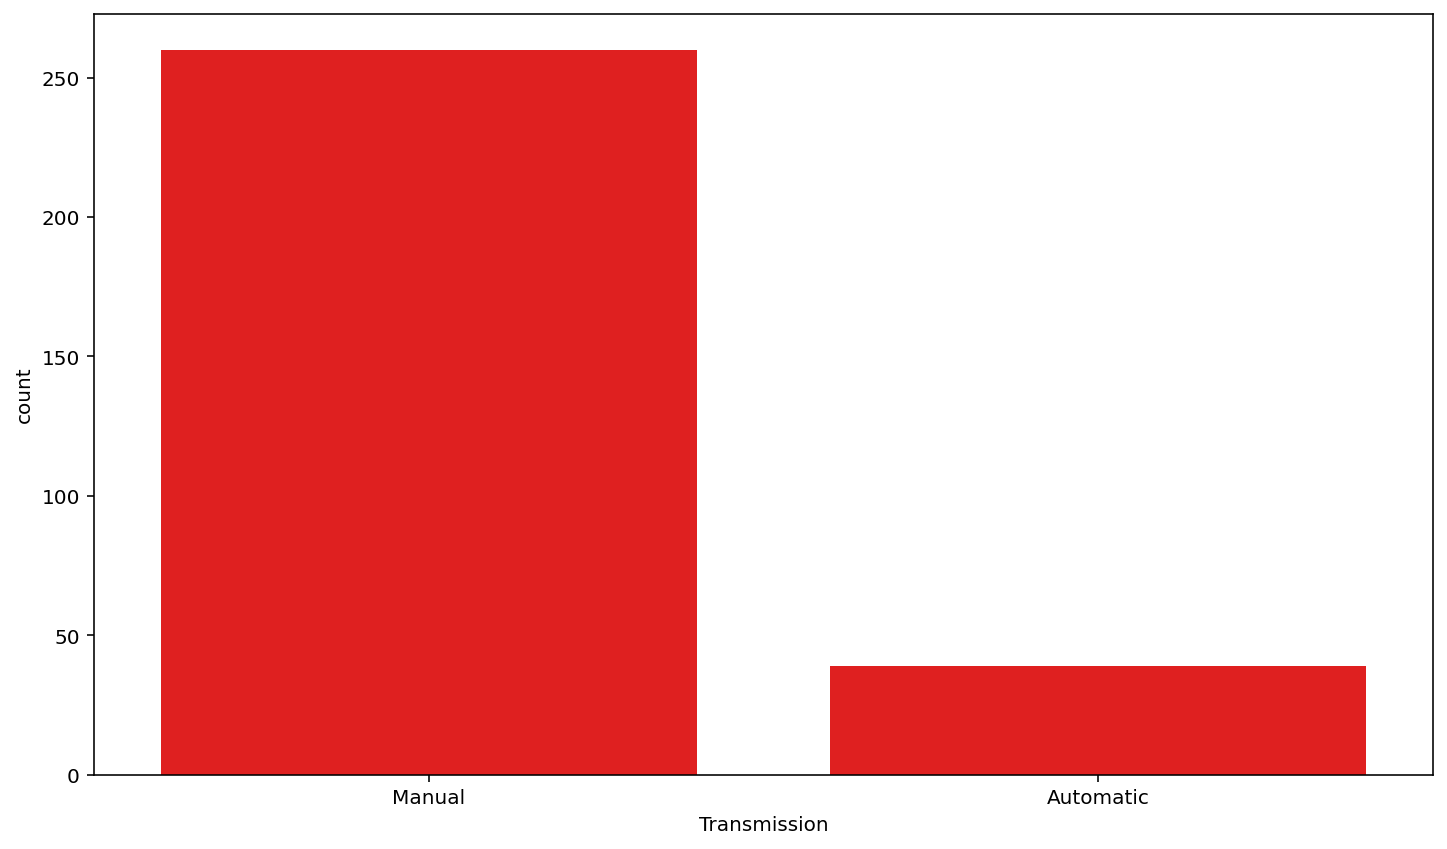

In [41]:
sns.countplot(x='Transmission',data=data, color='red')

In [49]:
#which seller appears teh most 
data['Seller_Type'].value_counts()

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64

<Axes: xlabel='Seller_Type', ylabel='count'>

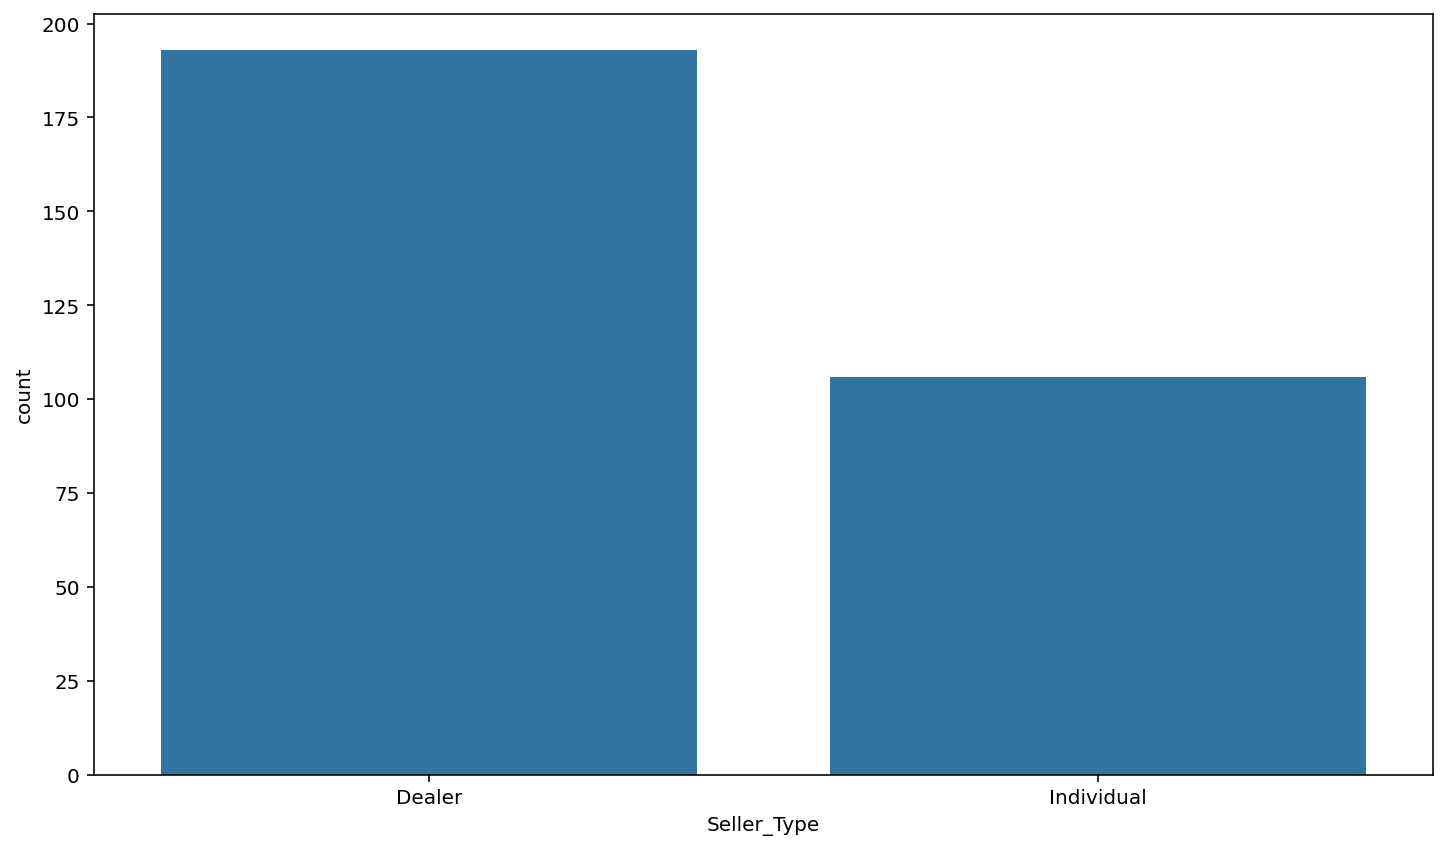

In [50]:
sns.countplot(x='Seller_Type',data=data)

In [56]:
fuel_type = data['Fuel_Type'].value_counts()

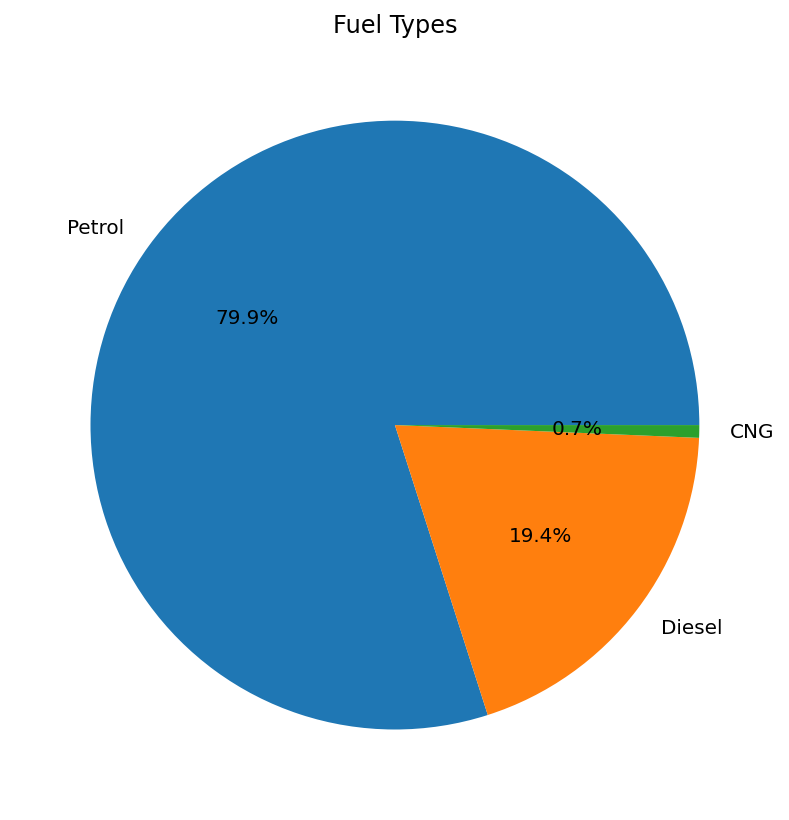

In [59]:
plt.pie(fuel_type,labels=fuel_type.index,autopct='%1.1f%%')

plt.title("Fuel Types")
plt.show()

In [66]:
#car model with the highest kms driven
data.groupby('Car_Name')['Kms_Driven'].mean().sort_values(ascending=False).head(5)


Car_Name
Activa 3g        250250.0
camry            142000.0
corolla          135154.0
800              127000.0
Honda Karizma    121500.0
Name: Kms_Driven, dtype: float64

In [67]:
#top 5 highest selling prices of cars
data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False).head(5)

Car_Name
land cruiser    35.000000
fortuner        18.254000
innova          12.777778
creta           11.800000
elantra         11.600000
Name: Selling_Price, dtype: float64